# Dokumentasi Analisis Data Penyewaan Sepeda (Bike Sharing)

## Libraries
- Streamlit: Digunakan untuk membuat aplikasi web interaktif.
- Pandas: Digunakan untuk manipulasi dan analisis data.
- Matplotlib: Digunakan untuk membuat visualisasi data.
- Seaborn: Digunakan untuk membuat visualisasi data statistik yang menarik dan informatif.
- Scikit-learn: Digunakan untuk machine learning, termasuk analisis klaster dengan algoritma K-Means.

In [16]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Tahap 1: Memuat Dataset
- Dataset terdiri dari dua file CSV, yaitu `day.csv` dan `hour.csv`.
- Data dibaca menggunakan Pandas dan dimuat ke dalam dua DataFrames: `day_df` dan `hour_df`.


In [12]:
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

## Tahap 3: Fungsi untuk Klasifikasi
- Membuat fungsi 'perform_classification' untuk melakukan klasifikasi menggunakan model RandomForestClassifier.
- Memisahkan fitur dan label.
- Melatih model dan mengukur akurasinya. `windspeed`.


## Tahap 4: Fungsi untuk K-Means Clustering
- Membuat fungsi 'perform_clustering' untuk melakukan klasterisasi menggunakan algoritma K-Means.
- Memilih fitur yang sesuai dan menambahkan label klaster.


## Tahap 5: Fungsi untuk Visualisasi
- Membuat beberapa fungsi untuk visualisasi data menggunakan Plotly Express:
    - 'plot_monthly_trend': untuk tren bulanan.
    - 'plot_factors': untuk faktor-faktor yang memengaruhi penggunaan sepeda.
    - 'plot_daily_trend': untuk tren harian.
    - 'plot_hourly_distribution': untuk distribusi jam..


## Tahap 6: Analisis dan Visualisasi Data
- Menggunakan Streamlit untuk membuat dashboard dengan berbagai plot dan interaksi.
- Menampilkan tren bulanan dan faktor-faktor yang memengaruhi penggunaan sepeda.
- Menampilkan tren harian dan distribusi jam penggunaan sepeda.


## Pilihan Analisis
1. **Analisis Bulanan 2011 dan 2012**:
   - Menampilkan analisis jumlah total sepeda berdasarkan situasi cuaca setiap bulannya untuk tahun 2011 dan 2012.
   - Analisis dilakukan dengan membuat diagram batang menggunakan Seaborn.

2. **Analisis Hari Libur 2011 dan 2012**:
   - Menampilkan pengaruh cuaca terhadap penggunaan sepeda selama hari libur untuk tahun 2011 dan 2012.
   - Dilakukan dengan membuat scatter plot menggunakan Seaborn.

3. **Heatmap Korelasi**:
   - Menampilkan heatmap korelasi antara suhu, kelembaban, dan penggunaan sepeda untuk tahun 2011.
   - Dilakukan dengan membuat heatmap menggunakan Seaborn.

4. **Analisis Klaster**:
   - Melakukan analisis clustering menggunakan algoritma K-Means.
   - Menampilkan pusat klaster dan jumlah data dalam setiap klaster.
   - Plot klaster ditampilkan dalam scatter plot menggunakan Seaborn.


## Tahap 7: Interpretasi Hasil
- Menganalisis tren dan faktor-faktor yang memengaruhi penggunaan sepeda.
- Menginterpretasi hasil klasterisasi dan akurasi klasifikasi.

## Dokumentasi (foto) pengerjaan

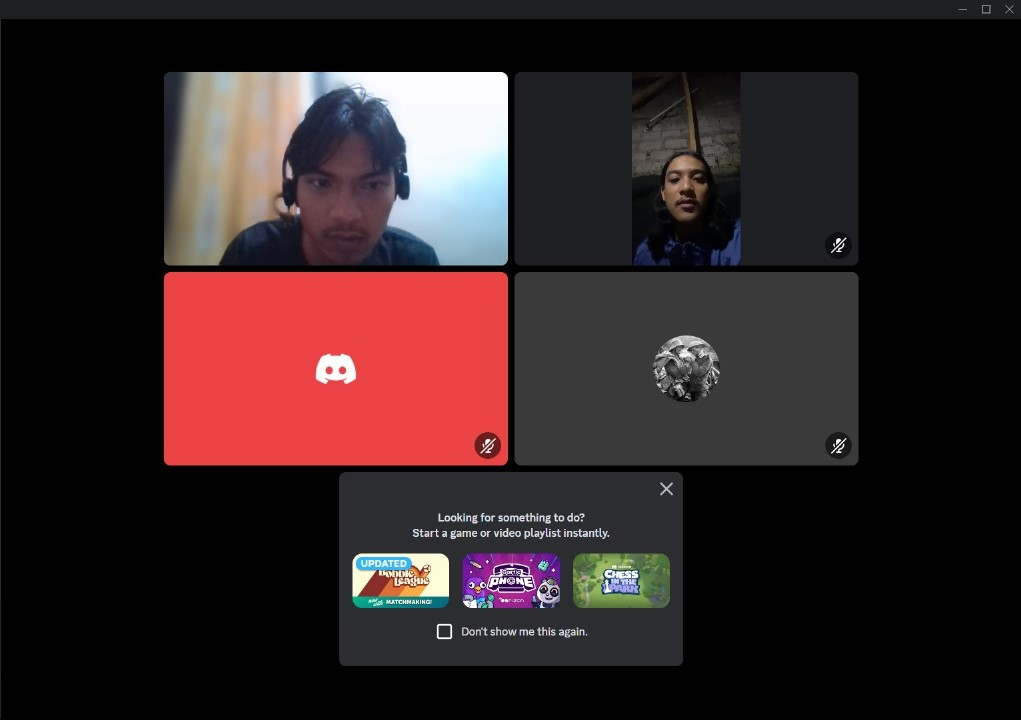 </br>
Foto1

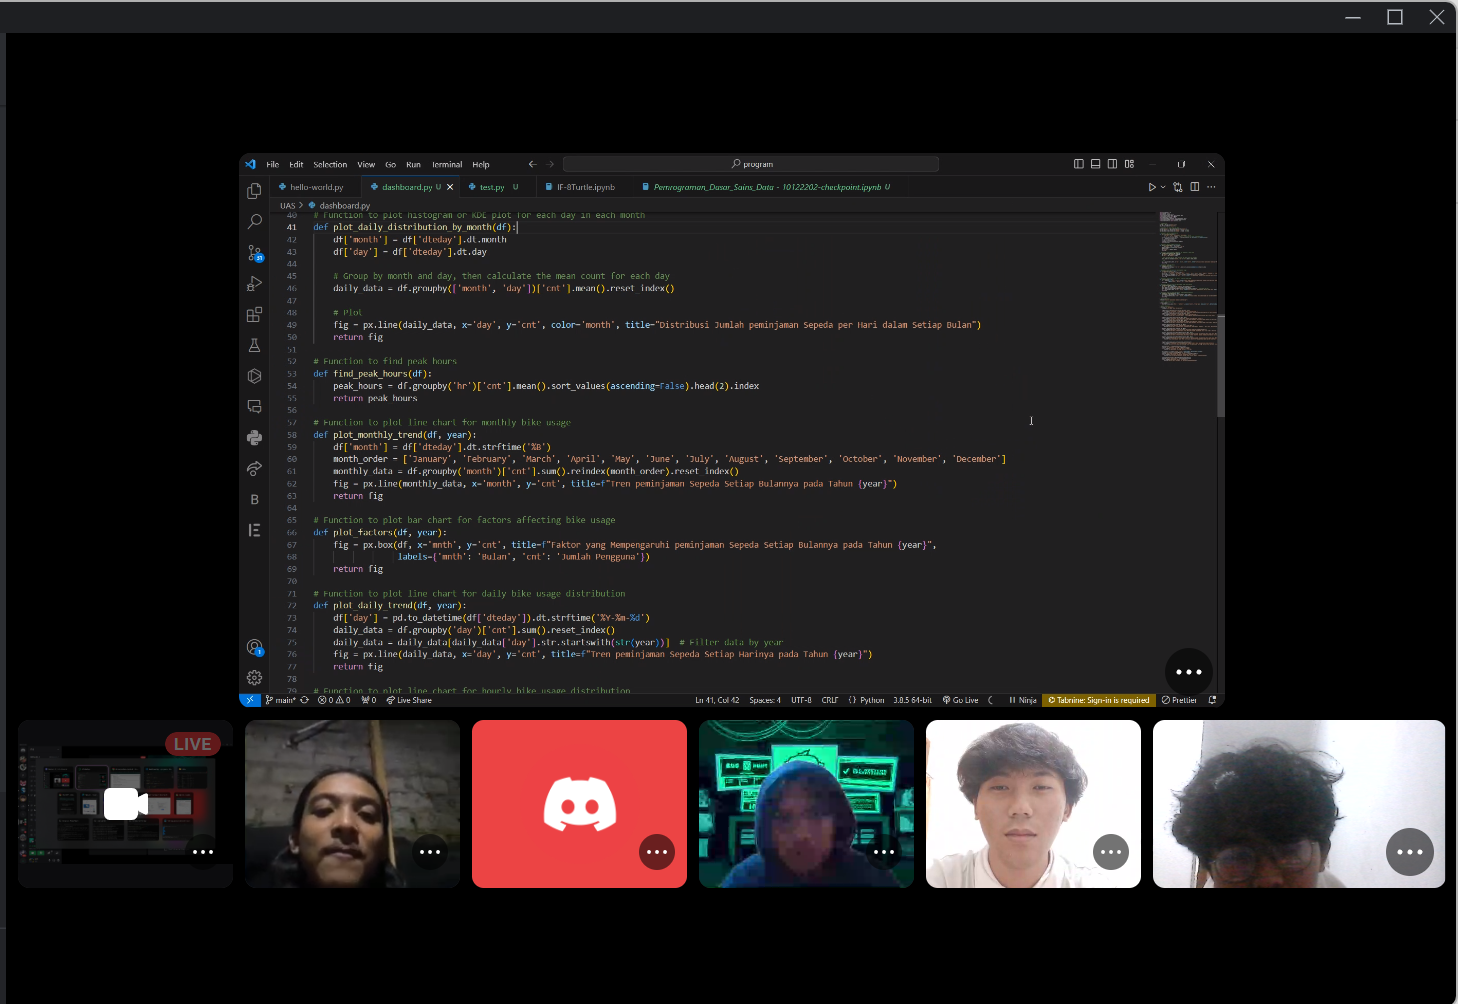 </br>
foto2


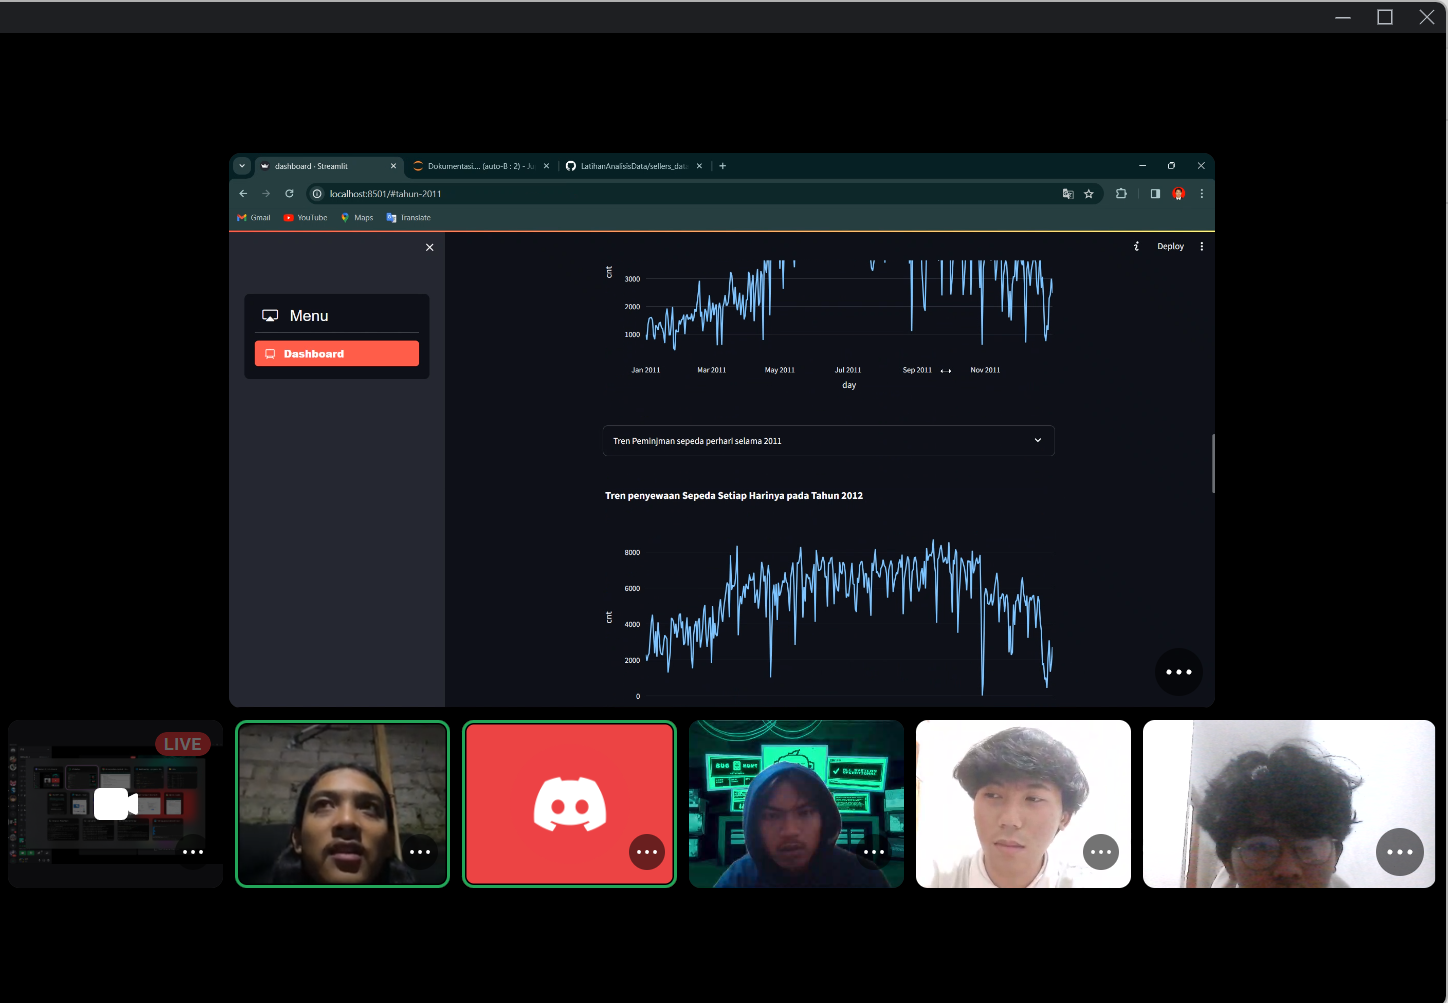 <br/>
foto3
